In [1]:
from mpl_toolkits import mplot3d

import numpy as np

import matplotlib.pyplot as plt

import matplotlib

plt.rcParams["font.size"] = 15
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.lines import Line2D

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os

os.chdir("..")

In [5]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader("main", "src/main.py").load_module()

eq = SourceFileLoader("eq", "src/numerical_equilibria_n_bit_vs_n_bit.py").load_module()

from main import invariant_distribution, invariant_distribution_analytically

**Plots**

In [6]:
b, c = 1, .7

In [7]:
def calculate_verts(b, c):    
    p = 1 - c / b

    points = [(0, 1, p), (p, 1, p), (1, p, p), (1, 0, p), (0, 0, p),
             ]

    dpoints = [(0, 1, p),
               (0, 1, 0),
               (p, 1, 0),
               (1, p, 0),
               (1, 0, 0),
               (0, 0, 0),
               (0, 0, p)]

    ipoints = [(0, 1, p), (p, 1, p), (1, p, p),
               (1, p, 0), (p, 1, 0), (0, 1, 0)]

    dline = [(p, 1, p), (p, 1, 0)]

    dline2 = [(1, 0, p), (1, 0, 0)]

    dline3 = [(0, 0, 0), (0, 1, 0)]

    verts = [np.array([np.array(point) for point in points]),
             np.array([np.array(point) for point in dpoints]),
             np.array([np.array(point) for point in ipoints]),
             np.array([np.array(point) for point in dline]),
             np.array([np.array(point) for point in dline2]),
             np.array([np.array(point) for point in dline3])]
    
    return verts

In [8]:
verts = calculate_verts(1, .5)

In [9]:
pdd = np.linspace(0, 1 - 1 / 2, 50)

pdc = np.linspace(0, 1 - (1 / 2 ) * 1 / 2, 50)

Xpdd, Xpdc = np.meshgrid(pdd, pdc)

pcd =  Xpdc

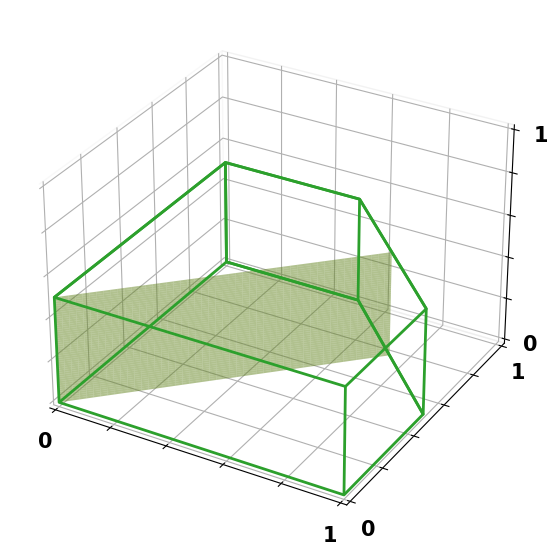

In [10]:

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(121, projection='3d')

axes = [ax1]

ax1.plot_surface(pcd, Xpdc, Xpdd, color="yellowgreen", alpha=.5, zorder=1);

ax1.add_collection3d(Poly3DCollection(verts,
                                     alpha=0.,
                                     linewidths=2,
                                     linestyle='-',
                                     edgecolors='tab:green'));

# ax1.view_init(15, 100)


for ax in axes:
    
    ax.set_xlim(0, 1);
    ax.set_ylim(0, 1);
    ax.set_zlim(0, 1);
    
#     ax.set_xlabel("$p_{CD}$", fontsize=15)
#     ax.set_ylabel("$p_{DC}$", fontsize=15)
#     ax.set_zlabel("$p_{DD}$", fontsize=15)

    ax.set_xticklabels([0, "", "", "", "", 1])
    ax.set_yticklabels([0, "", "", "", "", 1])
    ax.set_zticklabels([0, "", "", "", "", 1])
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
    
fig.savefig("figures/nash_donation_reactive_two.pdf", bbox_inches='tight')

In [11]:
R, S, T, P = 3, 0, 5, 1


pdd = pdc = pcd = np.linspace(0, 1, 10)

con = np.linspace(0, 1 / 2, 10)

con2 = np.linspace(1 / 3, 1, 10)


Xpdd1, Xpdc1 = np.meshgrid(con, con2)

Xpdd2, Xpcd2 = np.meshgrid(pdd, pcd)

Xpcd3, Xpdc3 = np.meshgrid(pcd, pdc)

In [12]:
condition1_pdd = (P - R) / (P - T) + 0 * Xpcd3 + 0 * Xpdc3 # 1 need

condition2_pcd = (3 * R + S - 2 * P - (R - S) * Xpdd1 - (T - P) * Xpdc1) / (T - P) #  2 don't need

condition3_pcd = (4 * R - 2 * S - P - T - (R - S) * (Xpdd1 + Xpdc1)) / (T - P)  #  3 need

condition4_pcd = (3 * R - 2 * S - T - (R - S) * Xpdc1) / (R - S)  #  4 need

condition5_pcd = (2 * R - S - P - (T - P) * Xpdc1) / (R - S) # 5

In [13]:
# vertsB = [
#          np.array([[1/3, 1, 0],
#                    [1/3, 1, 1/2],
#                    [1, 1/3, 1/2],
#                    [1, 1/3, 0]]), 
#          np.array([[1, 2/3, 0],
#                    [1, 0.5/3, 1/2],
#                    [1.5/4, 1, 1/2],
#                    [3/4, 1, 0],]),
#         ]


In [20]:
# vertsB = [np.array([[0, 1, 1/2],
#                    [0, 0, 1/2],
#                    [1, 0, 1/2],
#                    [1, 1/6, 1/2],
#                    [3/8, 1, 1/2],
#                    [1/3, 1, 1/2],
#                    ]), 
#         ]

In [38]:
vertsB = [np.array([[0, 1, 1/2],
                   [0, 0, 1/2],
                   [1, 0, 1/2],
                   [1, 1/6, 1/2],
                   [11/16, 7/12, 1/2],
                   [1/3, 1, 1/2],
                   ]),
#           np.array([
#                    [11/16, 7/12, 1/2],
#                     [1/3, 1, 1/2],
#                     [1/3, 1, 0],
#               [11/16, 7/12, 0],
#                     [1, 1/6, 0],
#                     [1, 1/6, 1/2]]),
          np.array([
                    [1, 1/6, 0],
                    [1, 1/6, 1/2],
                    [1, 0, 1/2],
                    [1, 0, 0]]),
          np.array([
                    [1, 0, 1/2],
                    [1, 0, 0],
                    [0, 0, 0],
           [0, 0, 1/2]])
        ]

vertsC = [np.array([[0, 1, 0],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1/6, 0],
                   [11/16, 7/12, 0],
                   [1/3, 1, 0],
                   ]), 
          np.array([[0, 1, 1/2],
                   [0, 1, 0],]),
          np.array([[0, 0, 1/2],
                   [0, 0, 0]]),
          np.array([[1, 0, 1/2],
                   [1, 0, 0]]),
          np.array([[1, 1/6, 1/2],
                   [1, 1/6, 0,]]),
          np.array([[1/3, 1, 1/2],
                   [1/3, 1, 0]])]



In [39]:
R, S, T, P = 3, 0, 5, 1


pdd = pdc = pcd = np.linspace(0, 1, 10)

con = np.linspace(0, 1 / 2, 10)

con2 = np.linspace(1 / 3, 1, 10)


Xpdd1, Xpdc1 = np.meshgrid(con, con2)

Xpdd2, Xpcd2 = np.meshgrid(pdd, pcd)

Xpcd3, Xpdc3 = np.meshgrid(pcd, pdc)

In [40]:
condition1_pdd = (P - R) / (P - T) + 0 * Xpcd3 + 0 * Xpdc3 # 1 need

condition2_pcd = (3 * R + S - 2 * P - (R - S) * Xpdd1 - (T - P) * Xpdc1) / (T - P) #  2 don't need

condition3_pcd = (4 * R - 2 * S - P - T - (R - S) * (Xpdd1 + Xpdc1)) / (T - P)  #  3 need

condition4_pcd = (3 * R - 2 * S - T - (R - S) * Xpdc1) / (R - S)  #  4 need

condition5_pcd = (2 * R - S - P - (T - P) * Xpdc1) / (R - S) # 5

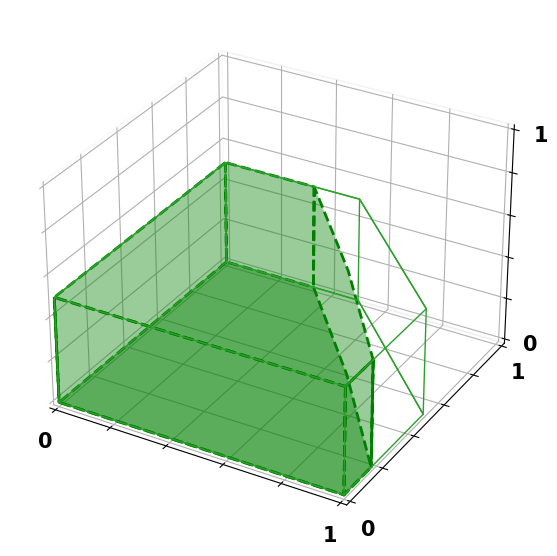

In [42]:
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(121, projection='3d')

axes = [ax1]

# ax1.add_collection3d(Poly3DCollection(verts,
#                                      alpha=0,
#                                      facecolor="tab:green",
#                                      linewidths=2,
#                                      linestyle='-',
#                                      edgecolors='tab:green'));

ax1.add_collection3d(Poly3DCollection(vertsB,
                                     alpha=.4,
                                     linewidths=2,
                                     linestyle='--',
                                     facecolor="green",
                                     edgecolors='green'));

ax1.add_collection3d(Poly3DCollection(vertsC,
                                     alpha=.4,
                                     linewidths=2,
                                     linestyle='--',
                                     facecolor="green",
                                     edgecolors='green'));

# for i, point in zip(np.linspace(1, 3/8), points):
#     ax1.scatter(i, point, 1/2)


ax1.add_collection3d(Poly3DCollection(verts,
                                     alpha=0,
                                     linewidths=1,
                                     linestyle='-',
                                     edgecolors='tab:green',
                                     facecolors='tab:green'));

# ax1.view_init(30, 130)


for ax in axes:
    
    ax.set_xlim(0, 1);
    ax.set_ylim(0, 1);
    ax.set_zlim(0, 1);
    
#     ax.set_xlabel("$p_{CD}$", fontsize=15)
#     ax.set_ylabel("$p_{DC}$", fontsize=15)
#     ax.set_zlabel("$p_{DD}$", fontsize=15)

    ax.set_xticklabels([0, "", "", "", "", 1])
    ax.set_yticklabels([0, "", "", "", "", 1])
    ax.set_zticklabels([0, "", "", "", "", 1])
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
fig.savefig("figures/nash_pd_reactive_two.pdf", bbox_inches='tight')

In [30]:
import sympy as sym

t = sym.symbols("t")

In [96]:
sym.solve(sym.Rational(3, 8) + sym.Rational(5, 8) * t + 1 - sym.Rational(5, 6) * t - sym.Rational(4, 3))

[1/5]

In [101]:
sym.Rational(3, 8) + sym.Rational(5, 8) * sym.Rational(1, 2)

11/16

In [102]:
1 - sym.Rational(5, 6) * sym.Rational(1, 2)

7/12

In [109]:
sym.solve(4 * sym.Rational(11, 16) + 3 * sym.Rational(7, 12) + 3 * t - 6)

[1/2]

**data**

In [21]:
def get_df_and_good(c, good_thres=.95):
    
    names = [f"p_{i}" for i in range(1, 5)] + ["t", "cooperation"]
    
    evol = pd.read_csv(f"data/matlab_data/bits_4_beta_1_seed_1_c_{c}.csv", names=names)
    
    evol = evol.drop_duplicates()
    
    times = evol['t'].values

    frequencies = []

    for i, time in enumerate(times):
        if i == 0:
            pass
        else:
            frequencies.append(time - times[i - 1])
    frequencies.append(10 ** 7 - times[-1])
    frequencies = np.array(frequencies)
    evol['freq'] = frequencies
    
    return evol, evol[evol['p_1'] >= good_thres]

In [ ]:
evol, good = get_df_and_good(c, good_thres=.95)

In [ ]:
verts = calculate_verts(1, .2)

In [ ]:
to_plot = good.sort_values('freq')[-500:][['p_2', 'p_3', 'p_4', 'freq']].values

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(131, projection='3d')

ax2 = fig.add_subplot(132, projection='3d')

ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax, c in zip(axes, [.2, .5, .7]):
    
    evol, good = get_df_and_good(c, good_thres=.95)
    
    verts = calculate_verts(1, c)
    
    to_plot = good.sort_values('freq')[-200:][['p_2', 'p_3', 'p_4', 'freq']].values


    ax.add_collection3d(Poly3DCollection(verts, facecolors="darkorange",
                                         alpha=0.25,
                                         linewidths=1,
                                         linestyle='-',
                                         edgecolors='darkred',));

    sc = ax.scatter(to_plot[:, 0],
                to_plot[:, 1],
                to_plot[:, 2],
                c=to_plot[:, 3],
                s=30,
                vmin=1000,
                vmax=50000,
                cmap='inferno',
                );
    
    if c == .5:
        cb = fig.colorbar(sc, ax=ax2, orientation='horizontal', fraction=0.050, pad=0.10)
        
for ax in axes:
    
    ax.view_init(22, -60)
    
    ax.set_xlim(0, 1);
    ax.set_ylim(0, 1);
    ax.set_zlim(0, 1);
    
    ax.set_xlabel("$p_{CD}$", fontsize=15)
    ax.set_ylabel("$p_{DC}$", fontsize=15)
    ax.set_zlabel("$p_{DD}$", fontsize=15)

    ax.set_xticklabels([0, "", "", "", "", 1])
    ax.set_yticklabels([0, "", "", "", "", 1])
    ax.set_zticklabels([0, "", "", "", "", 1])
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
    
fig.tight_layout();

### Invasion

In [ ]:
c = .2

evol, good = get_df_and_good(c, good_thres=.95)

In [ ]:
sort = good.sort_values('p_4')

In [ ]:
plt.plot(sort['p_4'], sort['freq']);

### Planes to draw

In [ ]:
c = .5

p = 1 - c

In [ ]:
x1 = np.linspace(0, 1, 50)

y = np.linspace(0, p, 50)

xx2, yy2 = np.meshgrid(x1, y)

z2 =  1 / 2 * xx2  + 0

x = np.linspace(0, p + .042, 50)

xx1, yy1 = np.meshgrid(x, y)

z =   2 * xx1 ** 1.2 + 0

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(131, projection='3d')

verts = calculate_verts(1, c)
    
    
ax.add_collection3d(Poly3DCollection(verts, facecolors="w",
                                     alpha=0.25,
                                     linewidths=1,
                                     linestyle='--',
                                     edgecolors='black',));

ax.plot_surface(z, xx1, yy1, alpha=0.5, color="tab:green");

ax.plot_surface(z2, xx2, yy2, alpha=0.5, color="tab:green");

ax.set_xlim(0, 1);
ax.set_ylim(0, 1);
ax.set_zlim(0, 1);

ax.view_init(22, -60)

In [ ]:
xx1.shape

In [ ]:
coops = np.zeros((50, 50))

for irow, row in enumerate(xx1):
    for icol, p3v in enumerate(row):
        
        p4v = yy1[irow, icol]
        
        p2v = 1 / 2 * p3v
        
        player = [.95, p2v, .95, p2v, p3v, p4v, p3v, p4v] * 2
        
        M = main.calculate_M(player, player, analytical=False)
        
        ss = invariant_distribution(M)
        
        coops[irow, icol] = ss[0] + ss[1]

In [ ]:
coops2 = np.zeros((50, 50))

for irow, row in enumerate(xx2):
    for icol, p3v in enumerate(row):
        
        p4v = yy2[irow, icol]
        
        p2v = 1 / 2 * p3v
        
        player = [.9, p2v, .9, p2v, p3v, p4v, p3v, p4v] * 2
        
        M = main.calculate_M(player, player, analytical=False)
        
        ss = invariant_distribution(M)
        
        coops2[irow, icol] = ss[0] + ss[1]

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(111, projection='3d')

verts = calculate_verts(1, c)
    
    
ax.add_collection3d(Poly3DCollection(verts, facecolors="w",
                                     alpha=0.25,
                                     linewidths=1,
                                     linestyle='-',
                                     edgecolors='darkred',));

ax.plot_surface(z, xx1, yy1,
                facecolors = cm.inferno(coops), rstride=1, cstride=1,
                )

ax.plot_surface(z2, xx2, yy2,
                facecolors = cm.inferno(coops2), rstride=1, cstride=1,);

ax.set_xlim(0, 1);
ax.set_ylim(0, 1);
ax.set_zlim(0, 1);

ax.set_xlabel("$p_{CD}$", fontsize=15)
ax.set_ylabel("$p_{DC}$", fontsize=15)
ax.set_zlabel("$p_{DD}$", fontsize=15)

ax.set_xticklabels([0, "", "", "", "", 1])
ax.set_yticklabels([0, "", "", "", "", 1])
ax.set_zticklabels([0, "", "", "", "", 1])

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
    
    
ax.view_init(22, -60)

In [ ]:
ss